# Replikacija podataka

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier

from bartpy.sklearnmodel import SklearnModel
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import pearsonr
from sklearn import preprocessing 


In [3]:
assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
#vle = pd.read_csv("anonymisedData/vle.csv")

#### Fig. 1. Number of students in 4 categories: Withdrawn, Failed, Pass, Distinction 


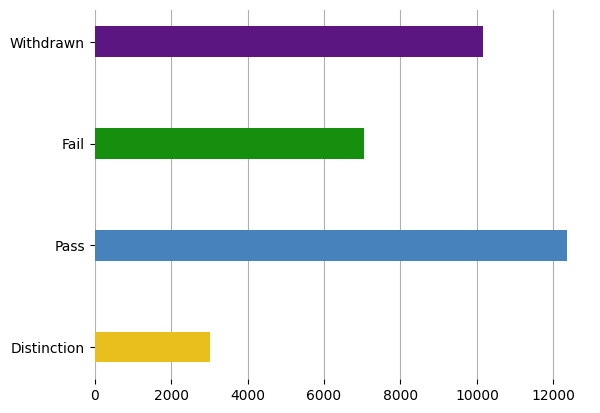

In [4]:
result = studentInfo['final_result'].unique()

result_count = studentInfo['final_result'].value_counts()

#sorted_result_count = result_count.sort_index()
#sorted_result = sorted(result)
custom_order = ['Distinction','Pass','Fail','Withdrawn']
sorted_result_count = result_count.loc[custom_order]

colors=['#e8bf1c','#4882bd','#178f0e','#5c1682']

fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
left_side = ax.spines["left"]
left_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)


plt.grid(axis='x', 
         zorder=0)
plt.barh(sorted_result_count.index, 
         sorted_result_count,
         color=colors, 
         height=0.3, 
         zorder = 5)


plt.show()


#### Table 1. Information about MOOCs. 

In [9]:
fa_date = assessments.groupby('code_module')['date'].min().reset_index()
reg_st = studentRegistration.groupby('code_module')['id_student'].count().reset_index()
year_run  = courses.groupby('code_module')['code_presentation'].agg(list).reset_index()

table1 = pd.merge(fa_date, reg_st, on='code_module')
table1 = pd.merge(table1, year_run, on='code_module')

print(table1)


  code_module  date  id_student             code_presentation
0         AAA  19.0         748                [2013J, 2014J]
1         BBB  12.0        7909  [2013J, 2014J, 2013B, 2014B]
2         CCC  18.0        4434                [2014J, 2014B]
3         DDD  20.0        6272  [2013J, 2014J, 2013B, 2014B]
4         EEE  33.0        2934         [2013J, 2014J, 2014B]
5         FFF  19.0        7762  [2013J, 2014J, 2013B, 2014B]
6         GGG  61.0        2534         [2013J, 2014J, 2014B]


#### Table 2. Pearson’s Correlation test result

pokušaj sa djelomičnim tablicama

In [10]:
merged_studentInfo_studentAssessment = pd.merge(studentInfo, studentAssessment, on='id_student')
merged_studentInfo_studentAssessment.dropna(inplace=True)

merged_studentInfo_studentRegistration = pd.merge(studentInfo, studentRegistration, on='id_student')
merged_studentInfo_studentRegistration.dropna(inplace=True)

studentVel_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()

merged_studentInfo_studentVle = pd.merge(studentInfo, studentVel_sum, on='id_student')
merged_studentInfo_studentVle.dropna(inplace=True)

merged_studentRegistration_studentVle = pd.merge(studentRegistration, studentVel_sum, on='id_student')
merged_studentRegistration_studentVle.dropna(inplace=True)

merged_studentAssessment_studentVle = pd.merge(studentAssessment, studentVle, on='id_student')
merged_studentAssessment_studentVle.dropna(inplace=True)

merged_studentRegistration_studentAssessment = pd.merge(studentRegistration, studentAssessment, on='id_student')
merged_studentRegistration_studentAssessment.dropna(inplace=True)

#1.30


In [12]:
merged_list = ['merged_studentInfo_studentAssessment','merged_studentInfo_studentRegistration',
               'merged_studentInfo_studentVle','merged_studentRegistration_studentVle',
               'merged_studentAssessment_studentVle','merged_studentRegistration_studentAssessment']
merged_list_notdef = [merged_studentInfo_studentAssessment,merged_studentInfo_studentRegistration,
               merged_studentInfo_studentVle,merged_studentRegistration_studentVle,
               merged_studentAssessment_studentVle,merged_studentRegistration_studentAssessment]
rows_csv = {"Gender" : "studentInfo", 
        "Educational Level" : "studentInfo", 
        "Age": "studentInfo", 
        "Previous Attempts": "studentInfo",
          "Disability": "studentInfo",
          "First Assig.Mark": "studentAssessment", 
          "Registration Date": "studentRegistration" ,
          "Clicks till Course Start": "studentVle"}
rows_csv_notdef = {"Gender" : studentInfo, 
        "Educational Level" : studentInfo, 
        "Age": studentInfo, 
        "Previous Attempts": studentInfo,
          "Disability": studentInfo,
          "First Assig.Mark": studentAssessment, 
          "Registration Date": studentRegistration ,
          "Clicks till Course Start": studentVle}
atributes = {"Gender" : "gender", 
        "Educational Level" : "highest_education", 
        "Age": "age_band", 
        "Previous Attempts": "num_of_prev_attempts",
          "Disability": "disability",
          "First Assig.Mark": "score", 
          "Registration Date": "date_registration" ,
          "Clicks till Course Start": "sum_click"}
#table
rows = ["Gender", "Educational Level", "Age", "Previous Attempts",
          "Disability", "First Assig.Mark", "Registration Date" ,"Clicks till Course Start"]
table_data = []
table_rows = ["", "Gender", "Educational Level", "Age", "Previous Attempts",
          "Disability", "First Assig.Mark", "Registration Date" ,"Clicks till Course Start"]
table_data.append(table_rows)

for r1 in range(0,len(rows)):
    tab_redak = []
    tab_redak.append(rows[r1])
    for r2 in range(0,len(rows)):
        #print('gledam za ' + rows[r1] + ' i ' +rows[r2] )
        row = rows[r1]  #ime prvog elementa
        column = rows[r2] #ime drugog elementa
        table_row = rows_csv[row] #u kojoj je tablici e1
        table_column = rows_csv[column] #u kojoj je tablici e2
        
        for naziv in merged_list:
            #print(table_row, table_column)
            #print('naziv:', naziv)
            if (table_row in naziv and table_column in naziv):
                #dobijem naziv atributa u tablici
                
                
                atr1 = atributes[row]
                atr2 = atributes[column]
                
                #print('atributi:',atr1, atr2)
                index = merged_list.index(naziv)
                #dobijem naziv tablice
                naziv_notdef = merged_list_notdef[index]
                #ako su tipovi atribuita object onda, label
                if atr1 == atr2:
                    naziv_notdef = rows_csv_notdef[row]
                    naziv_notdef.dropna(inplace=True)

                    
                list1 = naziv_notdef[atr1]
                list2 = naziv_notdef[atr2]
                label_encoder = preprocessing.LabelEncoder() 
                
                if (naziv_notdef[atr1].dtype == "object"):
                    #print('label encoder 1')
                    list1 = label_encoder.fit_transform(list1) 
                
                if (naziv_notdef[atr2].dtype == "object"):
                    #print('label encoder 2')
                    list2 = label_encoder.fit_transform(list2) 
                
                #list1 = [x for x in list1 if not np.isnan(x)]
                #list2 = [x for x in list2 if not np.isnan(x)]

                corr, _ = pearsonr(list1, list2)
                tab_redak.append( round(corr, 2))
                #print('corr:',corr)
                break
    #print('tab_redak:', tab_redak)
    table_data.append(tab_redak)
    tab_redak = []
    
#30s

del merged_studentInfo_studentAssessment
del merged_studentInfo_studentRegistration
del merged_studentInfo_studentVle
del merged_studentRegistration_studentVle
#del merged_studentAssessment_studentVle
del merged_studentRegistration_studentAssessment



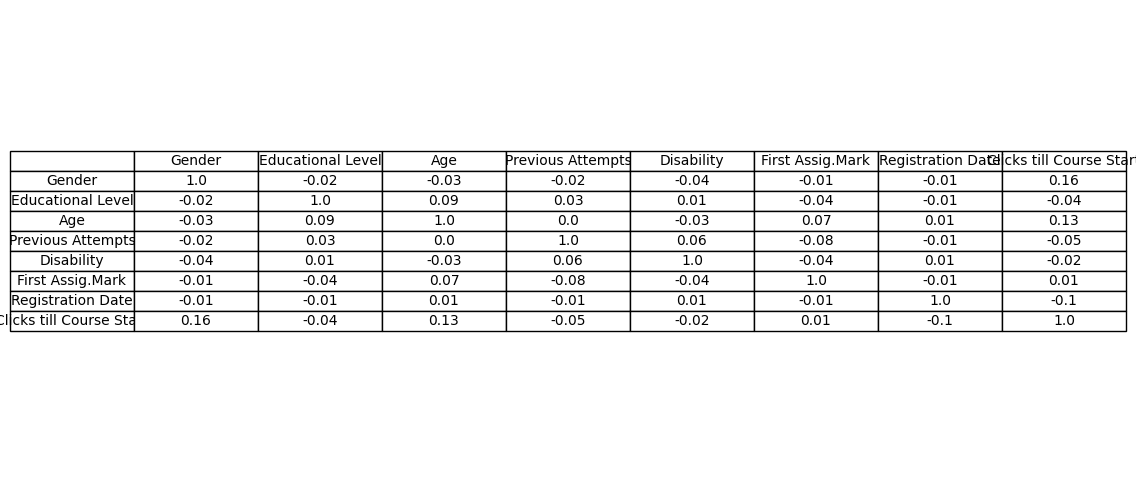

In [13]:
#ispis tablice
fig, ax = plt.subplots(figsize=(12, 6))

ax.axis('off')

table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()



pokušaj sa cijelom tablicom samo sa određenim podatcima

In [5]:

columns_studentInfo = ['id_student','gender', 'age_band', 'disability', 'num_of_prev_attempts', 'highest_education']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']


merged_table = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')

merged_table = pd.merge(merged_table,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table = pd.merge(merged_table,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

merged_table.dropna(inplace=True)

# 10s


In [15]:
from scipy.stats import pearsonr
from sklearn import preprocessing 

rows_csv = {"Gender" : "studentInfo", 
        "Educational Level" : "studentInfo", 
        "Age": "studentInfo", 
        "Previous Attempts": "studentInfo",
          "Disability": "studentInfo",
          "First Assig.Mark": "studentAssessment", 
          "Registration Date": "studentRegistration" ,
          "Clicks till Course Start": "studentVle"}

atributes = {"Gender" : "gender", 
        "Educational Level" : "highest_education", 
        "Age": "age_band", 
        "Previous Attempts": "num_of_prev_attempts",
          "Disability": "disability",
          "First Assig.Mark": "score", 
          "Registration Date": "date_registration" ,
          "Clicks till Course Start": "sum_click"}
#table
rows = ["Gender", "Educational Level", "Age", "Previous Attempts",
          "Disability", "First Assig.Mark", "Registration Date" ,"Clicks till Course Start"]
table_data = []
table_rows = ["", "Gender", "Educational Level", "Age", "Previous Attempts",
          "Disability", "First Assig.Mark", "Registration Date" ,"Clicks till Course Start"]
table_data.append(table_rows)

for r1 in range(0,len(rows)):
    tab_redak = []
    tab_redak.append(rows[r1])
    for r2 in range(0,len(rows)):
        row = rows[r1]  #ime prvog elementa
        column = rows[r2] #ime drugog elementa
        table_row = rows_csv[row] #u kojoj je tablici e1
        table_column = rows_csv[column] #u kojoj je tablici e2
        
                
        atr1 = atributes[row]
        atr2 = atributes[column]
        list1 = merged_table[atr1]
        list2 = merged_table[atr2]
        label_encoder = preprocessing.LabelEncoder() 
                
        if (merged_table[atr1].dtype == "object"):
                    list1 = label_encoder.fit_transform(list1) 
                
        if (merged_table[atr2].dtype == "object"):
                    list2 = label_encoder.fit_transform(list2) 
                
                

        corr, _ = pearsonr(list1, list2)
        tab_redak.append( round(corr, 2))
                
    #print('tab_redak:', tab_redak)
    table_data.append(tab_redak)
    
del merged_table
# 6min 21s

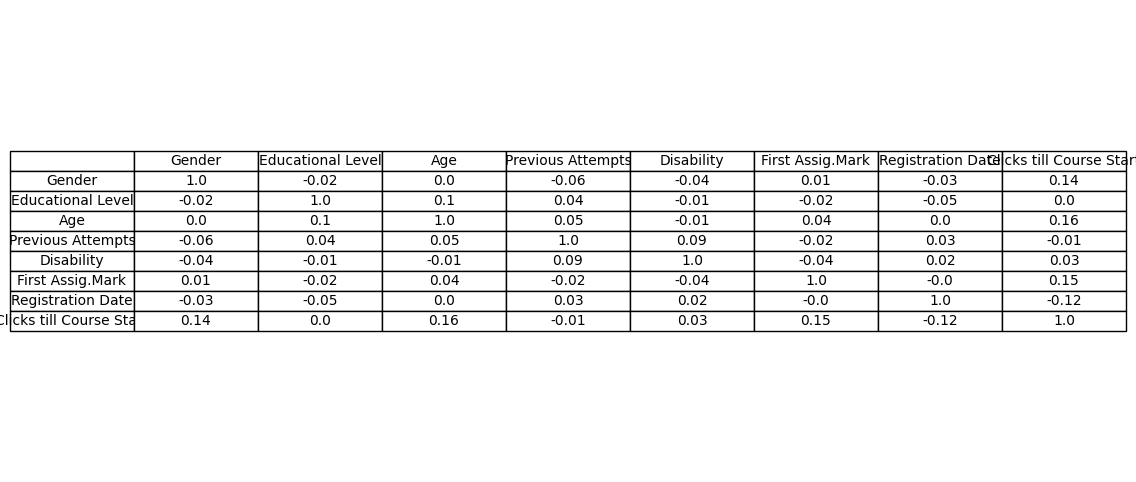

In [16]:
#ispis tablice
fig, ax = plt.subplots(figsize=(12, 6))

ax.axis('off')

table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

#### Table 3. Performance comparisons between three predictive models 


"The chosen variables for
the resulting csv file used to train our learning algorithms included the First Assignment
Mark, Educational Level, Clicks till Course Starts, Registration date, Age, and Gender.
70% of the data were used as the training data, and 30% as the test data."

In [6]:

columns_studentInfo = ['id_student','gender', 'age_band', 'highest_education', 'final_result']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']

merged_table_2 = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')
merged_table_2 = pd.merge(merged_table_2,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table_2 = pd.merge(merged_table_2,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

merged_table_2.dropna(inplace=True)
merged_table_2.drop('id_student',axis=1)

df = pd.DataFrame(merged_table_2)
#df.to_csv('merged_table_2.csv',index=False)


#uzet ću prvih 10 000 redaka
#merged_table_2 = df.sample(n=10000, random_state=42)
#merged_table_2.to_csv('merged_table_2.csv',index=False)


Withdrawn = {}
Fail = {}
Pass = {}
Distinction = {}




DECISION TREE

In [7]:
def decision_tree(value,dataDT):
    X = df[['gender',	'age_band',	'highest_education',	'score'	,'date_registration',	'sum_click']]

    #df['final_result'] = label_encoder.fit_transform(df['final_result']) 
    df['binary_target'] = (df['final_result'] == value).astype(int)

    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier()

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions, average='weighted')
    dataDT.append(precision)
    dataDT.append(recall)
    dataDT.append(f1_score)
    dataDT.append(accuracy)
    if value == 'Withdrawn':
        Withdrawn['precisionDT'] = precision
        Withdrawn['recallDT'] = recall
        Withdrawn['f1_scoreDT'] = f1_score
        Withdrawn['accuracyDT'] = accuracy
    if value == 'Fail':
        Fail['precisionDT'] = precision
        Fail['recallDT'] = recall
        Fail['f1_scoreDT'] = f1_score
        Fail['accuracyDT'] = accuracy
    if value == 'Pass':
        Pass['precisionDT'] = precision
        Pass['recallDT'] = recall
        Pass['f1_scoreDT'] = f1_score
        Pass['accuracyDT'] = accuracy
    if value == 'Distinction':
        Distinction['precisionDT'] = precision
        Distinction['recallDT'] = recall
        Distinction['f1_scoreDT'] = f1_score
        Distinction['accuracyDT'] = accuracy
    
    #ROC
    probabilities = clf.predict_proba(X_test)[:, 1]  

    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = roc_auc_score(y_test, probabilities)
    
    dataDT.append(fpr)
    dataDT.append(tpr)
    dataDT.append(thresholds)
    dataDT.append(roc_auc)
    


    if value == 'Pass':
        return confusion_matrix(y_test, predictions)
    del X_train, X_test, y_train, y_test, clf

In [8]:

cm_decision_tree = []
df = pd.DataFrame(merged_table_2)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 


values =['Withdrawn','Fail','Pass','Distinction']
dataDT = []
for i in values:
    
    
    if i == 'Pass':
       cm_decision_tree = decision_tree(i,dataDT)
    else:
        decision_tree(i,dataDT)
    

del df    


RANDOM FOREST

In [9]:
def random_forest(dataRF, value):
    X = df[['gender',	'age_band',	'highest_education',	'score'	,'date_registration',	'sum_click']]

    #df['final_result'] = label_encoder.fit_transform(df['final_result']) 
    df['binary_target'] = (df['final_result'] == value).astype(int)

    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
    clf = RandomForestClassifier(n_estimators=10, random_state=42)  

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions, average='weighted')
    dataRF.append(precision)
    dataRF.append(recall)
    dataRF.append(f1_score)
    dataRF.append(accuracy)
    
    if value == 'Withdrawn':
        Withdrawn['precisionRF'] = precision
        Withdrawn['recallRF'] = recall
        Withdrawn['f1_scoreRF'] = f1_score
        Withdrawn['accuracyRF'] = accuracy
    if value == 'Fail':
        Fail['precisionRF'] = precision
        Fail['recallRF'] = recall
        Fail['f1_scoreRF'] = f1_score
        Fail['accuracyRF'] = accuracy
    if value == 'Pass':
        Pass['precisionRF'] = precision
        Pass['recallRF'] = recall
        Pass['f1_scoreRF'] = f1_score
        Pass['accuracyRF'] = accuracy
    if value == 'Distinction':
        Distinction['precisionRF'] = precision
        Distinction['recallRF'] = recall
        Distinction['f1_scoreRF'] = f1_score
        Distinction['accuracyRF'] = accuracy
    
    #ROC
    probabilities = clf.predict_proba(X_test)[:, 1]  

    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = roc_auc_score(y_test, probabilities)
    
    dataRF.append(fpr)
    dataRF.append(tpr)
    dataRF.append(thresholds)
    dataRF.append(roc_auc)
    

    
    
    if value == 'Pass':
        return confusion_matrix(y_test, predictions)

In [11]:

df = pd.DataFrame(merged_table_2)
cm_random_forest = []
label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 

data_random_forest = {}


values =['Withdrawn','Fail','Pass','Distinction']
dataRF = []
for i in values:
    
    if i == 'Pass':
       cm_random_forest = random_forest(dataRF,i)
    else:
        random_forest(dataRF,i)
del df


BART

In [38]:
def BARTT(dataB,value):
    X = df[['gender',	'age_band',	'highest_education',	'score'	,'date_registration',	'sum_click']]

    #df['final_result'] = label_encoder.fit_transform(df['final_result']) 
    df['binary_target'] = (df['final_result'] == value).astype(int)

    y = df['binary_target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = SklearnModel()
    
    ######################### greška 
    #Parameters:	
        #X (pd.DataFrame) – training covariates
        #y (np.ndarray) – training targets
        #numpy_array = pandas_series.values
    y_train_bart = y_train.values
    model.fit(X_train, y_train_bart)
    predictions_binary = model.predict(X_test)
    def map_to_123(value2):
        if value2 < 0.5:
            return 0
        else:
            return 1
   
    transformed_list = [map_to_123(value2) for value2 in predictions_binary]


 
    
    accuracy = accuracy_score(y_test, transformed_list)
    #print(f'Accuracy: {accuracy}')
    #print(f'Score: {score}')

    #print('Classification Report:')
    #print(classification_report(y_test, transformed_list))
    
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, transformed_list, average='weighted')
    dataB.append(precision)
    dataB.append(recall)
    dataB.append(f1_score)
    dataB.append(accuracy)
    
    if value == 'Withdrawn':
        Withdrawn['precisionB'] = precision
        Withdrawn['recallB'] = recall
        Withdrawn['f1_scoreB'] = f1_score
        Withdrawn['accuracyB'] = accuracy
    if value == 'Fail':
        Fail['precisionB'] = precision
        Fail['recallB'] = recall
        Fail['f1_scoreB'] = f1_score
        Fail['accuracyB'] = accuracy
    if value == 'Pass':
        Pass['precisionB'] = precision
        Pass['recallB'] = recall
        Pass['f1_scoreB'] = f1_score
        Pass['accuracyB'] = accuracy
    if value == 'Distinction':
        Distinction['precisionB'] = precision
        Distinction['recallB'] = recall
        Distinction['f1_scoreB'] = f1_score
        Distinction['accuracyB'] = accuracy
    
    
    #ROC GRAF za distinction
    """ decision_values = model.decision_function(X_test)
    probabilities = 1 / (1 + np.exp(-decision_values))
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = roc_auc_score(y_test, probabilities)
    
    dataB.append(fpr)
    dataB.append(tpr)
    dataB.append(thresholds)
    dataB.append(roc_auc)
     """

    if value == 'Pass':
        return confusion_matrix(y_test, transformed_list)

In [46]:

cm_BART = []

#df = pd.DataFrame(merged_table_2)
df = pd.DataFrame(merged_table_2)
#df = df.sample(n=1000, random_state=42)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 


values =['Withdrawn','Fail','Pass','Distinction']
dataB=[]
for i in values:
    
    if i == 'Pass':
       cm_BART = BARTT(dataB,i)
    else:
        BARTT(dataB,i)
del df
#3min33s

In [56]:
table3_list = [
    ['','Metric', 'Decision Tree' ,'Random Forest', 'BART' ],
    ['Withdrawn','Precision',Withdrawn['precisionDT'],Withdrawn['precisionRF'],Withdrawn['precisionB']],
    ['Withdrawn','Recall',Withdrawn['recallDT'],Withdrawn['recallRF'],Withdrawn['recallB']],
    ['Withdrawn','F1',Withdrawn['f1_scoreDT'],Withdrawn['f1_scoreRF'],Withdrawn['f1_scoreB']],
    ['Withdrawn','Accuracy',Withdrawn['accuracyDT'],Withdrawn['accuracyRF'],Withdrawn['accuracyB']],
    
    ['Fail','Precision',Fail['precisionDT'],Fail['precisionRF'],Fail['precisionB']],
    ['Fail','Recall',Fail['recallDT'],Fail['recallRF'],Fail['recallB']],
    ['Fail','F1',Fail['f1_scoreDT'],Fail['f1_scoreRF'],Fail['f1_scoreB']],
    ['Fail','Accuracy',Fail['accuracyDT'],Fail['accuracyRF'],Fail['accuracyB']],
    
    ['Pass','Precision',Pass['precisionDT'],Pass['precisionRF'],Pass['precisionB']],
    ['Pass','Recall',Pass['recallDT'],Pass['recallRF'],Pass['recallB']],
    ['Pass','F1',Pass['f1_scoreDT'],Pass['f1_scoreRF'],Pass['f1_scoreB']],
    ['Pass','Accuracy',Pass['accuracyDT'],Pass['accuracyRF'],Pass['accuracyB']],
    
    ['Distinction','Precision',Distinction['precisionDT'],Distinction['precisionRF'],Distinction['precisionB']],
    ['Distinction','Recall',Distinction['recallDT'],Distinction['recallRF'],Distinction['recallB']],
    ['Distinction','F1',Distinction['f1_scoreDT'],Distinction['f1_scoreRF'],Distinction['f1_scoreB']],
    ['Distinction','Accuracy',Distinction['accuracyDT'],Distinction['accuracyRF'],Distinction['accuracyB']]
]

for i in range(0, len(table3_list)):
    for j in range(0, len(table3_list[i])):
        if type(table3_list[i][j]) != str:
            table3_list[i][j] = round(table3_list[i][j],2)

In [19]:
table3_list_2 = [
    ['','Metric', 'Decision Tree' ,'Random Forest'],
    ['Withdrawn','Precision',Withdrawn['precisionDT'],Withdrawn['precisionRF']],
    ['Withdrawn','Recall',Withdrawn['recallDT'],Withdrawn['recallRF']],
    ['Withdrawn','F1',Withdrawn['f1_scoreDT'],Withdrawn['f1_scoreRF']],
    ['Withdrawn','Accuracy',Withdrawn['accuracyDT'],Withdrawn['accuracyRF']],
    
    ['Fail','Precision',Fail['precisionDT'],Fail['precisionRF']],
    ['Fail','Recall',Fail['recallDT'],Fail['recallRF']],
    ['Fail','F1',Fail['f1_scoreDT'],Fail['f1_scoreRF']],
    ['Fail','Accuracy',Fail['accuracyDT'],Fail['accuracyRF']],
    
    ['Pass','Precision',Pass['precisionDT'],Pass['precisionRF']],
    ['Pass','Recall',Pass['recallDT'],Pass['recallRF']],
    ['Pass','F1',Pass['f1_scoreDT'],Pass['f1_scoreRF']],
    ['Pass','Accuracy',Pass['accuracyDT'],Pass['accuracyRF']],
    
    ['Distinction','Precision',Distinction['precisionDT'],Distinction['precisionRF']],
    ['Distinction','Recall',Distinction['recallDT'],Distinction['recallRF']],
    ['Distinction','F1',Distinction['f1_scoreDT'],Distinction['f1_scoreRF']],
    ['Distinction','Accuracy',Distinction['accuracyDT'],Distinction['accuracyRF']]
]

for i in range(0, len(table3_list_2)):
    for j in range(0, len(table3_list_2[i])):
        if type(table3_list_2[i][j]) != str:
            table3_list_2[i][j] = round(table3_list_2[i][j],2)

In [20]:
print(table3_list_2)

[['', 'Metric', 'Decision Tree', 'Random Forest'], ['Withdrawn', 'Precision', 0.8, 0.8], ['Withdrawn', 'Recall', 0.81, 0.81], ['Withdrawn', 'F1', 0.8, 0.81], ['Withdrawn', 'Accuracy', 0.81, 0.81], ['Fail', 'Precision', 0.85, 0.84], ['Fail', 'Recall', 0.86, 0.86], ['Fail', 'F1', 0.85, 0.84], ['Fail', 'Accuracy', 0.86, 0.86], ['Pass', 'Precision', 0.76, 0.73], ['Pass', 'Recall', 0.75, 0.73], ['Pass', 'F1', 0.75, 0.73], ['Pass', 'Accuracy', 0.75, 0.73], ['Distinction', 'Precision', 0.91, 0.9], ['Distinction', 'Recall', 0.91, 0.91], ['Distinction', 'F1', 0.91, 0.9], ['Distinction', 'Accuracy', 0.91, 0.91]]


In [21]:

file_path = "podatci2dio.txt"

# Open the file in write mode and write the list elements to it
with open(file_path, 'w') as file:
    
    for item in table3_list_2:
        file.write(f"{item}\n")
    


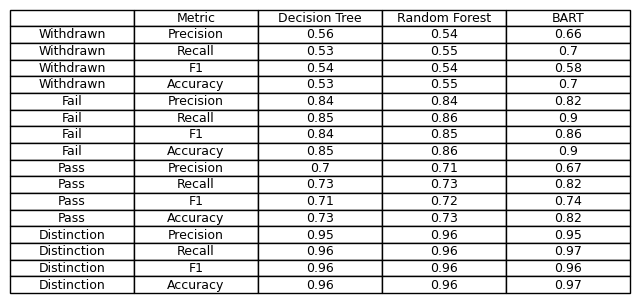

In [57]:
#ispis tablice
fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table3_list, loc='center', cellLoc='center', colLabels=None)

plt.show()

#### Table 4. Confusion Matrix for Pass versus the rest 


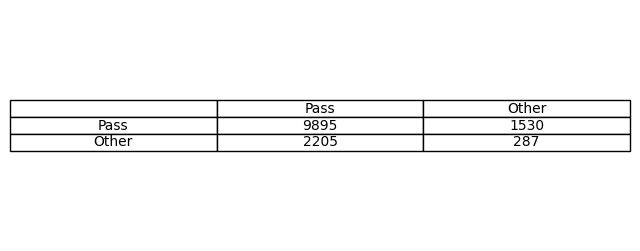

In [58]:
table_data_3 = [
    ['','Pass','Other'],
    ['Pass', cm_decision_tree[0][0],cm_decision_tree[0][1]],
    ['Other', cm_decision_tree[1][0],cm_decision_tree[1][1]],
]

#ispis tablice
fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table_data_3, loc='center', cellLoc='center', colLabels=None)

plt.show()


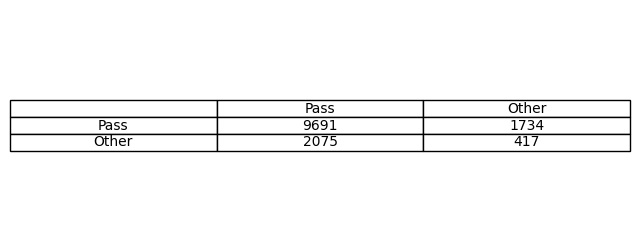

In [59]:
table_data_4 = [
    ['','Pass','Other'],
    ['Pass', cm_random_forest[0][0],cm_random_forest[0][1]],
    ['Other', cm_random_forest[1][0],cm_random_forest[1][1]],
]

#ispis tablice
fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table_data_4, loc='center', cellLoc='center', colLabels=None)

plt.show()

#### Fig. 3. BART (Left) Random Forest (Right) Decision Tree (Right) AUC graphs for Distinction versus the rest

ROC Random forest

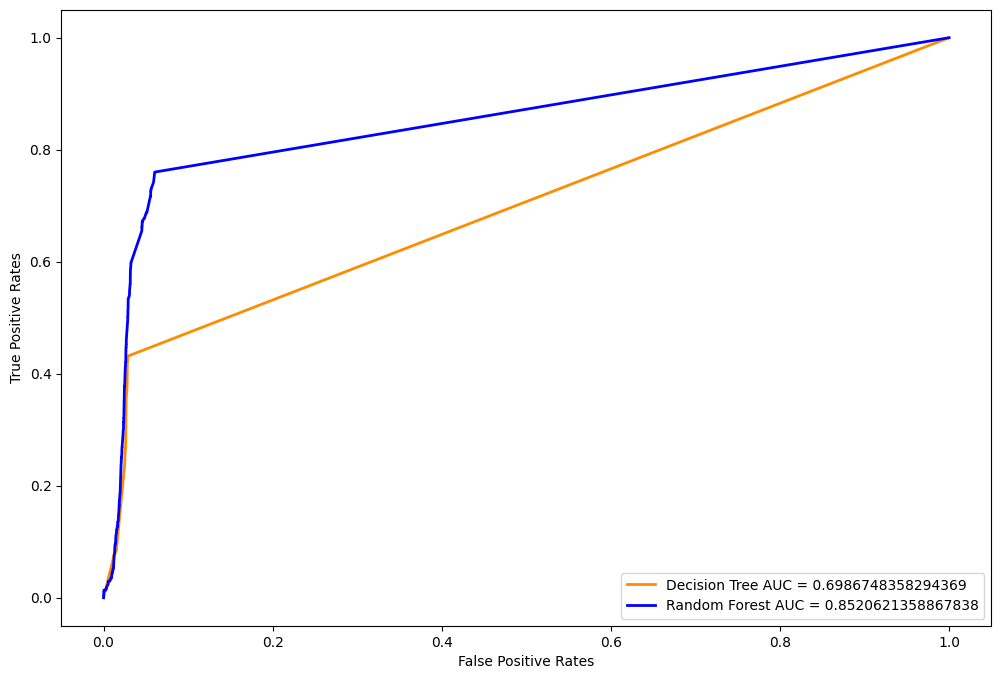

In [60]:


fpr_dt = dataDT[28]
tpr_dt = dataDT[29]
roc_auc_dt = dataDT[31]

plt.figure(figsize=(12, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree AUC = ' + str(roc_auc_dt))

# Plot  dataRF
fpr_rf = dataRF[28]
tpr_rf = dataRF[29]
roc_auc_rf = dataRF[31]

plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest AUC = ' + str(roc_auc_rf))

plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.legend(loc='lower right')
plt.show()


#### Fig. 4. Relationship between the number of clicks and the overall student outcome 


In [61]:
merged_data_3 = merged_table_2.groupby('id_student').agg({'score': 'mean', 'sum_click': 'mean'}).reset_index()
merged_data_3.dropna(inplace=True)
merged_data_3 = pd.merge(merged_data_3, studentInfo, on='id_student')
merged_data_3 = merged_data_3[merged_data_3['final_result'] != 'Withdrawn']


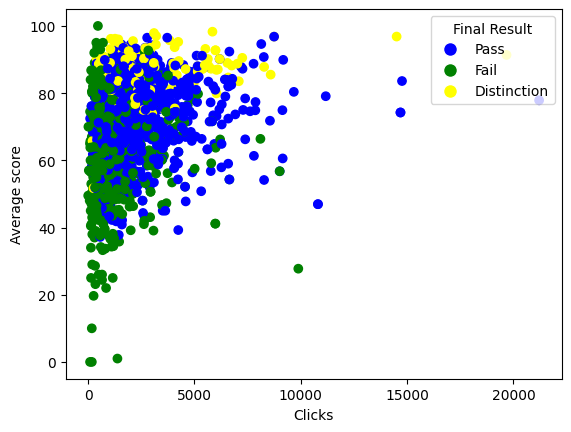

In [63]:


color_mapping = {'Pass': 'blue','Fail': 'green', 'Distinction': 'yellow'}

colors = merged_data_3['final_result'].map(color_mapping)

plt.scatter(merged_data_3['sum_click'], merged_data_3['score'],c=colors)
plt.xlabel('Clicks')
plt.ylabel('Average score')

legend_labels = ['Pass', 'Fail', 'Distinction']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) for label in legend_labels]
plt.legend(legend_handles, legend_labels, title='Final Result', loc='upper right')

plt.show()